In [76]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Création du signal

on cherche à modéliser un carré pour ce la on va prendre 100 points

### 1.1 Carré

In [1]:
def carré(n,long):
    X=[]
    Y=[]
    x=np.linspace(0,long,n//4)
    for i in x:
        X.append(i)
        Y.append(0)
    for j in x:
        X.append(long)
        Y.append(j)
    for i in x[::-1]:
        X.append(i)
        Y.append(long)
    for j in x[::-1]:
        X.append(0)
        Y.append(j)
    return X,Y


X,Y=carré(100,1)

plt.scatter(X,Y)


NameError: name 'np' is not defined

### 1.2 Passage en complexe

In [78]:
def complexification(X,Y):
    L=[]
    for x in range(len(X)):
        L.append(X[x]+1j*Y[x])
    return L

L=complexification(X,Y)

print(L)

[0j, (0.041666666666666664+0j), (0.08333333333333333+0j), (0.125+0j), (0.16666666666666666+0j), (0.20833333333333331+0j), (0.25+0j), (0.29166666666666663+0j), (0.3333333333333333+0j), (0.375+0j), (0.41666666666666663+0j), (0.4583333333333333+0j), (0.5+0j), (0.5416666666666666+0j), (0.5833333333333333+0j), (0.625+0j), (0.6666666666666666+0j), (0.7083333333333333+0j), (0.75+0j), (0.7916666666666666+0j), (0.8333333333333333+0j), (0.875+0j), (0.9166666666666666+0j), (0.9583333333333333+0j), (1+0j), (1+0j), (1+0.041666666666666664j), (1+0.08333333333333333j), (1+0.125j), (1+0.16666666666666666j), (1+0.20833333333333331j), (1+0.25j), (1+0.29166666666666663j), (1+0.3333333333333333j), (1+0.375j), (1+0.41666666666666663j), (1+0.4583333333333333j), (1+0.5j), (1+0.5416666666666666j), (1+0.5833333333333333j), (1+0.625j), (1+0.6666666666666666j), (1+0.7083333333333333j), (1+0.75j), (1+0.7916666666666666j), (1+0.8333333333333333j), (1+0.875j), (1+0.9166666666666666j), (1+0.9583333333333333j), (1+1j

### 1.3 Transformation signal

## 2. Décomposition de fourrier

In [79]:
def fourrier_decompo(Liste_complexes,f):
    n=len(Liste_complexes)
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for x in range(n)]]
    L=np.array(Liste_complexes)
    return np.sum(vect_exp*L.T)

list_fourrier=[fourrier_decompo(L,x) for x in range(len(L))]
print(list_fourrier)

[(50+50j), (-39.579341819034795-42.14771814851596j), (-3.552713678800501e-15-1.7763568394002505e-15j), (-1.7763568394002505e-15+1.3322676295501878e-15j), (-1.7763568394002505e-15+8.659739592076221e-15j), (-1.1764981316546295-1.6193107578775554j), (8.881784197001252e-15-1.0436096431476471e-14j), (-2.6645352591003757e-15+1.1324274851176597e-14j), (-1.1102230246251565e-14-4.6629367034256575e-15j), (-0.24847809437339552-0.45197997576252114j), (-3.552713678800501e-15-1.6209256159527285e-14j), (1.7763568394002505e-14-1.3322676295501878e-15j), (-7.771561172376096e-15-1.0880185641326534e-14j), (-0.07159847996122604-0.18083711778477674j), (3.7969627442180354e-14+2.2426505097428162e-14j), (-9.769962616701378e-15-5.551115123125783e-15j), (-3.8191672047105385e-14-1.2434497875801753e-14j), (-0.01988972453425819-0.07746536251638148j), (2.4202861936828413e-14-2.5979218776228663e-14j), (4.796163466380676e-14+7.72715225139109e-14j), (-3.630429290524262e-14+5.88418203051333e-15j), (-0.003484672788490739

### 3. $TF^{-1}$

In [80]:
def tf_1(coeff_fourriers,k,x):
    n=len(coeff_fourriers)
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for f in range(k)]]
    L=np.array(coeff_fourriers[0:k])
    return 1/n*np.sum(vect_exp*L.T)
    
    



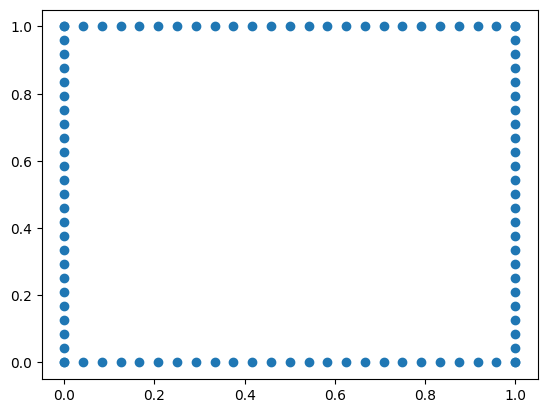

In [82]:
long=len(L)
s_reconstruit=[tf_1(list_fourrier,100,x) for x in range(long)]

X=[x.real for x in s_reconstruit]
Y=[y.imag for y in s_reconstruit]

plt.scatter(X,Y)